In [6]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
data = pd.read_csv('sample_data.csv')

# Create a list of [latitude, longitude] pairs from the dataset
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]

# Create a Folium map object centered on Singapore (approximate central coordinates)
sg_map = folium.Map(location=[1.357, 103.819], zoom_start=12)

# Add a heat map layer to the map
HeatMap(heat_data).add_to(sg_map)

# Save the map to an HTML file
sg_map.save('singapore_heatmap.html')

print("Heat map generated and saved as 'singapore_heatmap.html'")


Heat map generated and saved as 'singapore_heatmap.html'


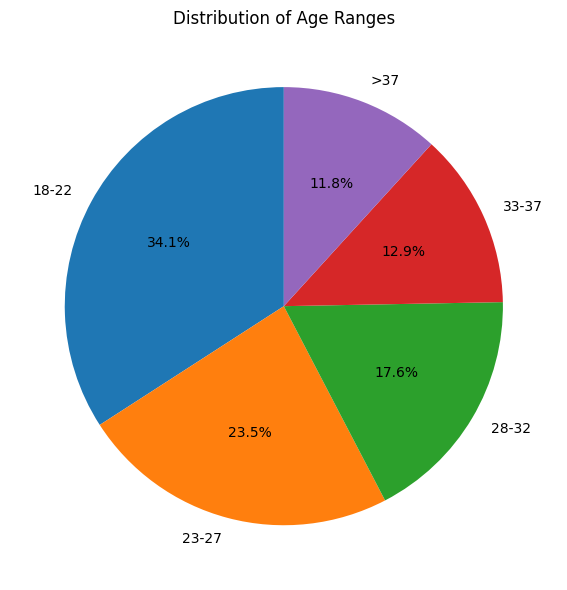

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("sample_data.csv")

# ---------------------------
# 1. Pie Chart: Distribution of Age Ranges
# ---------------------------
age_counts = data["Age_Range"].value_counts()
plt.figure(figsize=(6,6))
age_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Age Ranges")
plt.ylabel("")  # Remove y-label for a cleaner look
plt.tight_layout()
plt.show()

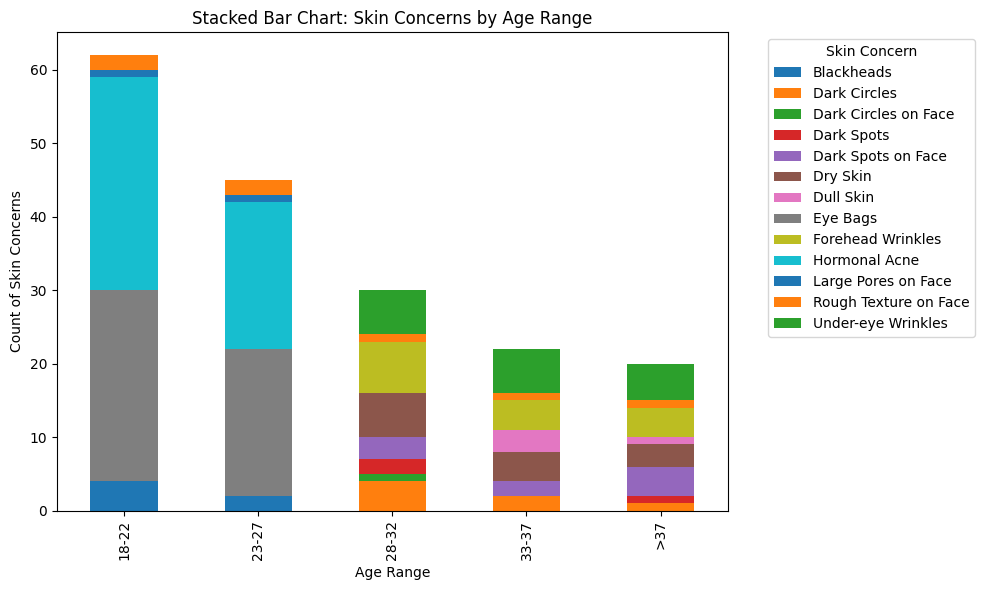

In [13]:
# ---------------------------
# 2. Stacked Bar Chart: Skin Concerns by Age Range
# ---------------------------
# Use get_dummies to split the Skin_Concerns column based on the separator ", "
skin_dummies = data["Skin_Concerns"].str.get_dummies(sep=", ")

# Combine the dummies with the original Age_Range column
data_with_dummies = pd.concat([data["Age_Range"], skin_dummies], axis=1)

# Group by Age_Range and sum up the counts for each skin concern
concerns_by_age = data_with_dummies.groupby("Age_Range").sum()

# Plot the stacked bar chart
concerns_by_age.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Stacked Bar Chart: Skin Concerns by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Count of Skin Concerns")
plt.legend(title="Skin Concern", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()